# <center>Домашняя работа - Метрики качества в задачах классификации</center>

In [2]:
from sklearn import cross_validation, datasets, linear_model, metrics 
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Сгенерируем набор данных

Обратите особое внимание на параметр random_state - от него зависит весь наш искуственный датасет.

In [3]:
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

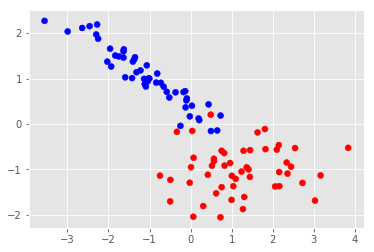

In [5]:
colors = ListedColormap(['red', 'blue'])
plt.scatter(list(map(lambda x: x[0], clf_data)), list(map(lambda x: x[1], clf_data)), c = clf_target, cmap = colors);

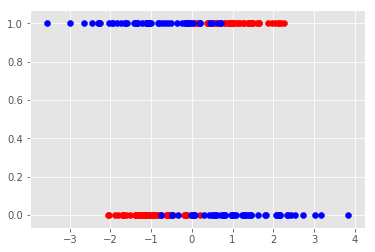

In [8]:
plt.scatter(list(map(lambda x:x[1], clf_data)), clf_target, color = 'r')
plt.scatter(list(map(lambda x:x[0], clf_data)), clf_target, color = 'b');

In [9]:
# Поделим даные на train и test
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = cross_validation.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

Обучим модель логистической регресии

In [10]:
# Задаем тип классификатора
classifier = linear_model.LogisticRegression()

In [11]:
# Обучаем его на трейне
classifier.fit(clf_train_data, clf_train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# Делаем предсказания метки класса для тестовых данных
predictions = classifier.predict(clf_test_data)

In [13]:
# Делаем предсказания вероятности принадлежности к классу
probability_predictions = classifier.predict_proba(clf_test_data)

#### Задание 1. Выведите метки классов тестового датасета 

In [15]:
clf_test_labels

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0])

#### Задание 2. Выведите предсказанные метки классов 

In [16]:
predictions

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0])

#### Задание 3. Выведите предсказанную вероятность приналдежности к классу на тестовом датасете

In [18]:
probability_predictions[:, 0]

array([  3.82680637e-05,   9.52113672e-01,   8.84750418e-01,
         2.10514222e-04,   9.93787317e-01,   8.81005024e-02,
         3.90938897e-03,   9.86626593e-01,   1.90734778e-03,
         9.69776120e-01,   9.13721472e-01,   3.34729973e-01,
         2.04495607e-03,   5.26118417e-02,   9.75552209e-01,
         7.95467631e-01,   1.33038764e-04,   9.94363398e-01,
         9.93632324e-01,   2.49027389e-02,   9.68429788e-01,
         9.23971872e-01,   6.94983054e-01,   9.91273001e-01,
         9.19888928e-01,   7.44800920e-01,   4.90449366e-01,
         1.69927532e-02,   3.74371899e-01,   9.89071006e-01])

#### Задание 4. Напишите расчет метрики accuracy

Посказка: используйте clf_test_labels и predictions

In [21]:
acc = sum(predictions[i] == clf_test_labels[i] for i in range(len(predictions))) / len(predictions)
acc

0.96666666666666667

In [22]:
# Проверьте правильность вычислений - ваш результат должен быть таким же, как и результат metrics.accuracy_score
metrics.accuracy_score(clf_test_labels, predictions)

0.96666666666666667

#### Задание 5. Составьте матрицу ошибок - confusion matrix

Посказка: используйте метод confusion_matrix

In [24]:
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[17  1]
 [ 0 12]]


In [49]:
tn, fp, fn, tp = metrics.confusion_matrix(clf_test_labels, predictions).ravel()
tn, fp, fn, tp

(17, 1, 0, 12)

#### Задание 6. Вычислите метрику precision 

In [50]:
prc = tp / (tp + fp)
prc

0.92307692307692313

In [38]:
# Проверьте правильность вычислений - ваш результат должен быть таким же, как и результат metrics.precision_score
metrics.precision_score(clf_test_labels, predictions)

0.92307692307692313

#### Задание 7. Вычислите метрику recall

In [51]:
rec = tp / (tp + fn)
rec

1.0

In [34]:
# Проверьте правильность вычислений - ваш результат должен быть таким же, как и результат metrics.recall_score
metrics.recall_score(clf_test_labels, predictions)

1.0

#### Задание 8. Вычислите метрику F1

In [41]:
prc = metrics.precision_score(clf_test_labels, predictions)
rec = metrics.recall_score(clf_test_labels, predictions)
f1 = 2 * (prc * rec) / (prc + rec)
f1

0.96000000000000008

In [42]:
# Проверьте правильность вычислений - ваш результат должен быть таким же, как и результат metrics.f1_score
metrics.f1_score(clf_test_labels, predictions)

0.96000000000000008

### Построим ROC кривую - ROC curve

In [43]:
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

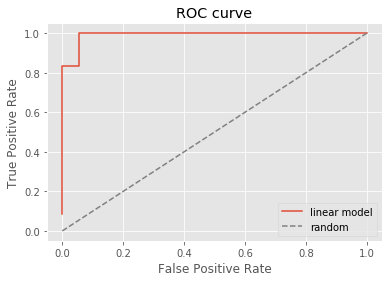

In [45]:
plt.plot(fpr, tpr, label = 'linear model')
plt.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = "lower right");

#### Задание 9. Посчитайте площадь под ROC кривой - ROC AUC

Подсказка: используйте metrics.roc_auc_score

In [46]:
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

#### Задание 10: Посчитайте площадь под PR кривой - PR AUC

Подсказка: используйте metrics.average_precision_score

In [47]:
metrics.average_precision_score(clf_test_labels, probability_predictions[:,1])

0.9866452991452993